#### **Tugas**

* Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
* Anda diperbolehkan melakukan eksplorasi terhadap,
    * Metode pra pengolahan
    * Pemilihan fitur
    * Arsitektur ANN
    * Fungsi Aktiviasi
* ANN diimplementasikan dengan menggunakan tensorflow.
* **JELASKAN HASIL YANG ANDA DAPATKAN,**

    * **AKURASI**

    * **CONFUSION MATRIX**

    * **KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN**

#### **Langkah 1 - Import Library**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#### **Langkah 2 - Load Dataset MNIST**

In [22]:
# Load dataset MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### **Langkah 3 - Pra Pengolahan Data**

In [23]:
# Pra Pengolahan Data
# Normalisasi data (dari rentang 0-255 ke rentang 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0


In [24]:
# Merubah label menjadi one-hot encoding
y_train = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

#### **Langkah 4 - Arsitektur ANN dan Fungsi Aktivasi**

In [25]:
# Arsitektur ANN
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Mengubah data 28x28 menjadi 784 vektor
    # fungsi aktivasi
    Dense(128, activation='relu'),  # Hidden Layer 1 dengan 128 neuron dan ReLU
    Dense(64, activation='relu'),   # Hidden Layer 2 dengan 64 neuron dan ReLU
    Dense(10, activation='softmax') # Output layer dengan 10 neuron dan Softmax
])

c:\Users\sukma bagus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### **Langkah 5 - Kompilasi Model**

In [26]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### **Langkah 6 - Pelatihan Model**

In [27]:
# Melatih model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test_cat))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8733 - loss: 0.4224 - val_accuracy: 0.9589 - val_loss: 0.1402
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9686 - loss: 0.1043 - val_accuracy: 0.9726 - val_loss: 0.0946
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9788 - loss: 0.0671 - val_accuracy: 0.9698 - val_loss: 0.1017
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9849 - loss: 0.0499 - val_accuracy: 0.9721 - val_loss: 0.0874
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9872 - loss: 0.0386 - val_accuracy: 0.9716 - val_loss: 0.0968
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9896 - loss: 0.0318 - val_accuracy: 0.9770 - val_loss: 0.0898
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9916 - loss: 0.0254 - val_accuracy: 0.9751 - val_loss: 0.0892
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9937 - loss: 0.0197 - 

In [28]:
# Evaluasi Model
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f'Akurasi: {accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9751 - loss: 0.1132
Akurasi: 97.84%


In [29]:
# Prediksi menggunakan data uji
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)


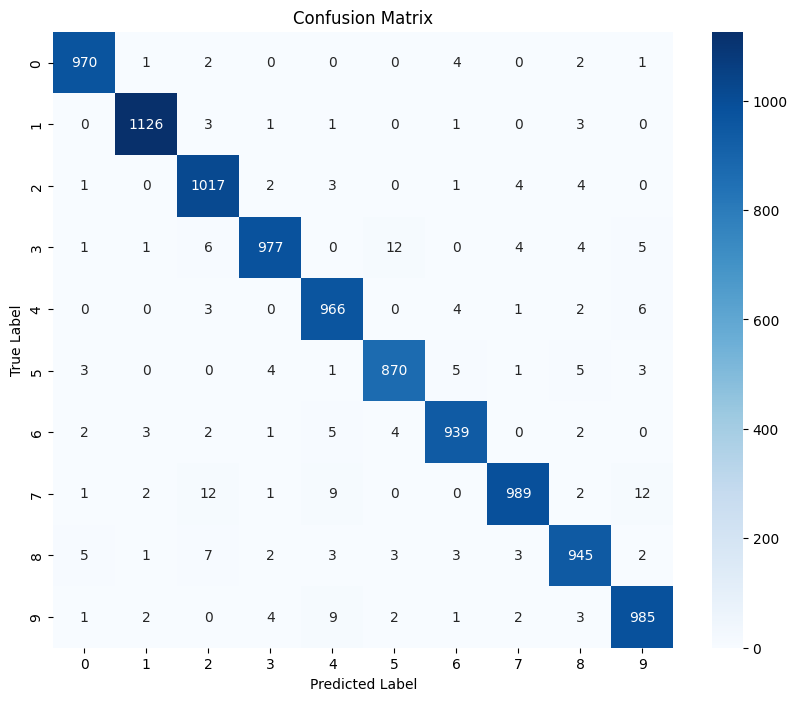

In [31]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### **Hasil yang didapatkan**

1. Akurasi 
    * Dari hasil pelatihan dan evaluasi, akurasi model
    ANN tersebut yaitu 0.9751 atau 97%
    * Akurasi dapat ditingkatkan dengan penambahan epoch, penambahan neuron, atau pengaturan parameter lain.
2. Confusion Matrix
    * Visualisasi hasil confusion matrix dapat dilihat diatas
    * Untuk melihat performa model pada setiap kelas, Misalnya, angka yang di klasifikasi dengan benar akan muncul di diagonal utama (dari kiri atas ke kanan bawah). Jika ada kesalahan klasifikasi, angka akan muncul di luar diagonal utama.
3. Konfigurasi Model
    * Pra Pengolahan:
        - Data di-normalisasi dari rentang 0-255 ke rentang 0-1 untuk mempercepat pelatihan.
        - One-hot Encoding mengubah label menjadi bentuk one-hot encoding untuk output multi-kelas. Misal, angka diubah menjadi [0,0,0,0,1,0,0,0,0,0]
    * Pemilihan Fitur 
        - Dataset MNIST terdiri dari gambar hitam putih berukuran 28x28 piksel, sehingga setiap gambar memiliki 784 fitur (28x28). 
        - Tidak ada pemilihan fitur khusus, semua piksel dari gambar digunakan sebagai input
        - Data akan diubah dari bentuk 2D (28x28) menjadi 1D (784) menggunakan layer Flatten dalam arsitektur ANN.
    * Arsitektur ANN 
        - Input Layer: Layer pertama menggunakan Flatten untuk merubah input dari gambar 28x28 menjadi vektor panjang 784 (fitur input).
        - Output Layer: Menggunakan layer Dense dengan 10 neuron dan aktivasi Softmax untuk klasifikasi 10 kelas (angka 0-9).
    * Fungsi Aktivasi 
        - Fungsi ReLU didefinisikan sebagai: 
            𝑓(𝑥)=max(0,𝑥) Fungsi ini akan mengubah semua nilai negatif menjadi 0 dan mempertahankan nilai positifnya, sehingga cocok untuk hidden layer.
        - Fungsi Softmax mengubah output menjadi probabilitas, Fungsi ini memastikan bahwa output total adalah 1, yang cocok untuk klasifikasi multi-kelas. 
